In [1]:
import numpy as np
import torch
from autoencoder import AutoEncoder
import matplotlib.pyplot as plt


In [2]:
checkpoint_path = './model_checkpoints/exp-nonlin/md_000000073000.pt'
input_img = np.zeros((2, 32, 32))
model = AutoEncoder(grid=None, input_img=input_img)
model.load_state_dict(torch.load(checkpoint_path))

TypeError: AutoEncoder.__init__() got an unexpected keyword argument 'input_img'

In [14]:
model.cc_activations.shape

torch.Size([1, 1, 32, 32])

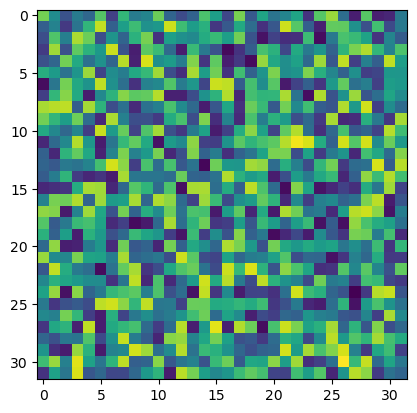

In [18]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
show(model.cc_activations[0].detach())